In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mylib import Style

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
Style().update()

In [3]:
data = pd.read_excel("../data/data-multi-sensor.xlsx", )
data.head()

,time(s),S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Temp,Humid
0,0.0,1498.250,1102.375,1447.625,1950.625,1886.000,1706.750,526.375,2167.375,1967.500,1654.375,34.79,39.59
1,0.1,1498.250,1102.250,1447.625,1950.500,1885.875,1706.750,526.000,2167.250,1967.500,1654.250,34.76,39.57
2,0.2,1498.125,1102.250,1447.750,1950.500,1885.875,1706.625,526.500,2167.125,1967.375,1654.250,34.82,39.61
3,0.3,1498.000,1102.125,1447.625,1950.375,1885.875,1706.625,525.875,2167.000,1967.375,1654.125,34.79,39.59
4,0.4,1498.000,1102.000,1447.625,1950.250,1885.750,1706.750,526.000,2166.875,1967.375,1654.125,34.79,39.60


In [4]:
COLS = list(data)[1:11]
COLS

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']

In [5]:
dict_warna = Style().warna()
dict_warna

{'S1': '#1F77B4',
 'S2': '#FF7F0F',
 'S3': '#2BA02B',
 'S4': '#D62727',
 'S5': '#9467BD',
 'S6': '#8C564C',
 'S7': '#E377C3',
 'S8': '#7F7F7F',
 'S9': '#BCBD21',
 'S10': '#15BECF',
 'Temp': '#187498',
 'Humid': '#EB5353'}

In [6]:
dict_warna["S1"]

'#1F77B4'

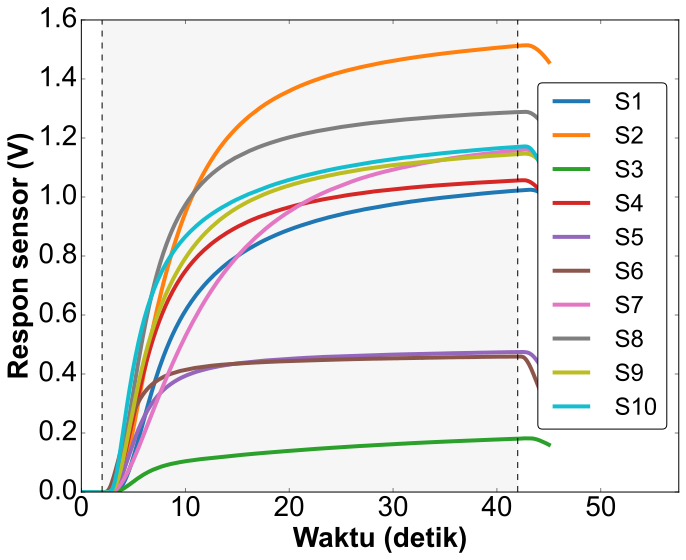

In [7]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
x = data["time(s)"].values

for i, col in enumerate(COLS):
    y0 = data[col].values[0]
    y = (data[col].values - y0) / 1000.0
    ax.plot(x, y, color=dict_warna[col], label=col, linewidth=4)

axes = plt.gca()
ylim_max = axes.get_ylim()[1]
ax.set_ylim([0, ylim_max])
ax.set_xlim([0, 57.5])
ax.legend(loc="center right")
ax.set_xlabel("Waktu (detik)")
ax.set_ylabel("Respon sensor (V)")
ax.axvline(x=2.0, color="k", linestyle="--")
ax.axvline(x=42.0, color="k", linestyle="--")
ax.fill_between([2, 42], y1=ylim_max, color="#f2f2f2", alpha=0.7)
fig.patch.set_facecolor("xkcd:white")

In [8]:
# save ke SVG
fig.savefig("../reports/figures/03_rawdata.svg")